In [1]:
import nbsetup as nb
import copy
import pickle
import seaborn as sns
import pandas as pd
import itertools
import scipy as sp
import numpy as np
import ensemblepy as ep
import matplotlib.pyplot as plt
from ensemblepy.stats import LEGEND

In [2]:
worlds = pickle.load(open('../../datasets/daisy_adjusted.pickle', 'rb'))

In [3]:
x = list(worlds.keys())
obs_temps = np.array([w[0] for w in worlds.values()])
obs_plants = np.array([w[1] for w in worlds.values()])


In [6]:
plants = []
for i, p in enumerate(obs_plants):
    plants.append(ep.Discrete(p, (0,1,2,3)))
    nb.cp(i)

200


In [8]:
mm = (obs_temps.min(), obs_temps.max())
temps = []
for i, t in enumerate(obs_temps):
    temps.append(ep.Continuous(t, mm))
    nb.cp(i)

200


In [129]:
def plot(x, analysis, top, bottom, S=3):
    g = sns.lineplot(ax=top, x=x, y=[a.incoherence for a in analysis], label=LEGEND['incoherence'][0], color=LEGEND['incoherence'][1])
    sns.lineplot(ax=top, x=x, y=[1-a.cohesion for a in analysis], label="1 - "+LEGEND['cohesion'][0], color=LEGEND['cohesion'][1])    
    
    divs = []
    for i, a in enumerate(analysis):
        for d in np.unique(np.around(a.divergences, 2)):
            divs.append({'x': x[i], 'y': d, 'hue': a.cohesion})
    divs = pd.DataFrame(divs)
    sns.scatterplot(data=divs, x='x', y='y', hue='hue', s=S, palette='icefire_r', ax=bottom, legend=False)
    bottom.set(ylabel='Radial JS divergences', xlabel='Primary model parameter luminosity')

In [36]:
data = []
for i, t in enumerate(temps):
    mm = np.mean(t.observations)
    for ensemble in t.observations:
        data.append({
            'x': x[i],
            'mean': np.mean(ensemble),
            'max': np.max(ensemble),
            'min': np.min(ensemble),
            'std': np.min(ensemble),
            'meanmean': mm,
        })
temp_data = pd.DataFrame(data)

In [11]:
concise = lambda d, l, func='mean': getattr(d.groupby('x'), func)()[l].to_list()

In [142]:
S = 10
FS = (15,12)

In [145]:
import scipy as sp

In [154]:
f = [sp.stats.f_oneway(*t)[1] for t in obs_temps]

/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


<AxesSubplot:>

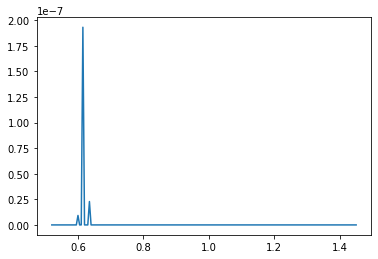

In [156]:
sns.lineplot(x=x, y=f)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


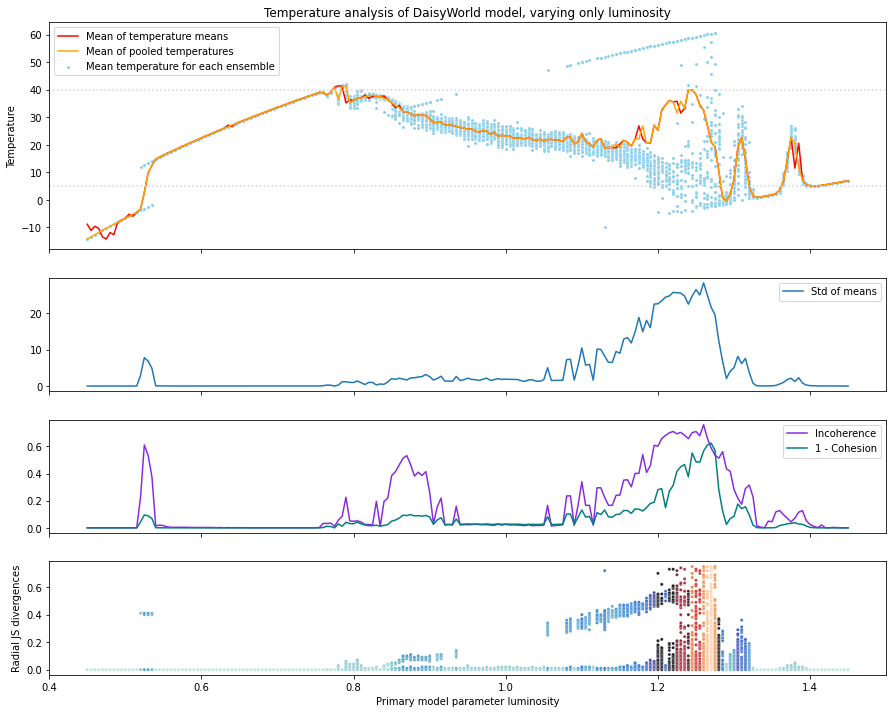

In [143]:
fig, (top, mid, lower, bottom) = plt.subplots(4, 1, sharex=True, figsize=FS, gridspec_kw={'height_ratios':[2, 1,1,1]})

# top
sns.scatterplot(data=temp_data, x='x', y='mean', s=S, ax=top, color='skyblue', label='Mean temperature for each ensemble')
sns.lineplot(x=x, y=concise(temp_data, 'mean'), ax=top, label='Mean of temperature means', color='red')
sns.lineplot(x=x, y=[np.mean(t) for t in obs_temps], ax=top, label='Mean of pooled temperatures', color='orange')
top.set(title='Temperature analysis of DaisyWorld model, varying only luminosity', ylabel='Temperature')
top.axhline(y=40, color='lightgrey', linestyle='dotted')
top.axhline(y=5, color='lightgrey', linestyle='dotted')
top.legend(loc='upper left')
# mid
sns.lineplot(x=x, y=concise(temp_data, 'mean', 'std'), ax=mid, label="Std of means")

# standards
plot(x, temps, lower, bottom, S)

fig.savefig('temperature.eps')

In [70]:
data = []
for i, p in enumerate(plants):
    for m in p.histograms:
        data.append({
            'x': x[i],
            'Empty': m[0],
            'White': m[1],
            'Black': m[2],
        })
plant_data = pd.DataFrame(data)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


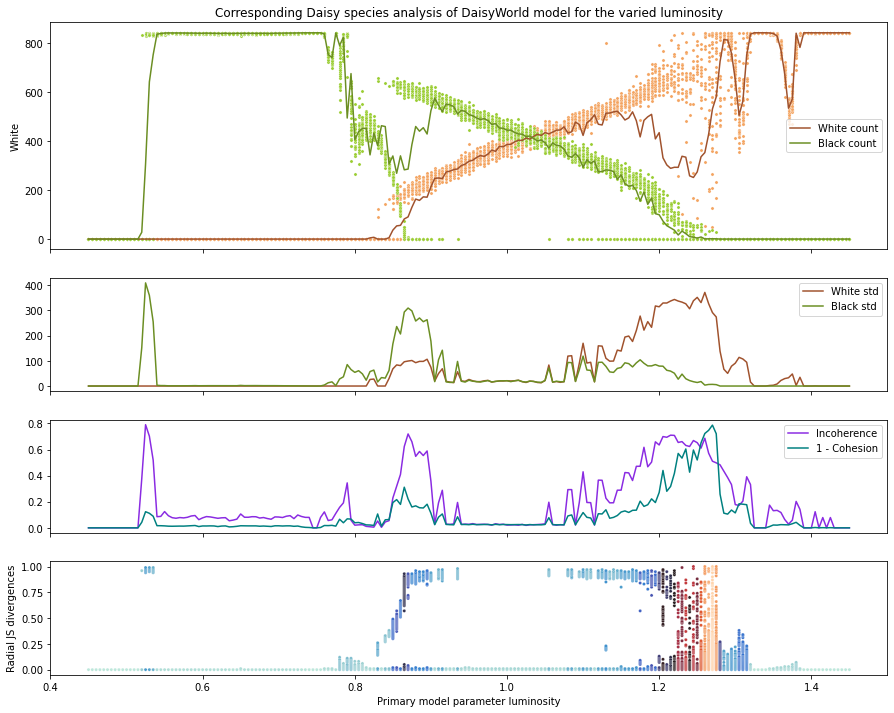

In [144]:
fig, (top, mid, middle, bottom) = plt.subplots(4, 1, sharex=True, figsize=FS, gridspec_kw={'height_ratios':[2, 1,1,1]})

top.set(title='Corresponding Daisy species analysis of DaisyWorld model for the varied luminosity')
keys = {'White': ('sienna', 'sandybrown'), 'Black': ('olivedrab', 'yellowgreen')}#, 'Empty': ('cornflowerblue', 'royalblue')}
for k, (line, point) in keys.items():
    sns.scatterplot(data=plant_data, x='x', y=k, s=S, ax=top, color=point)
    sns.lineplot(x=x, y=concise(plant_data, k), ax=top, color=line, label='%s count' % k)
    sns.lineplot(x=x, y=concise(plant_data, k, 'std'), color=line, ax=mid, label='%s std' % k)
top.legend(loc='center right')
    
plot(x, plants, middle, bottom, S)
fig.savefig('plants.eps')